# Résumé du cours d'introduction à Quiskit

## Qiskit ?

Il s'agit d'un module Python open source développé par IBM afin de simuler et d'interagir avec des circuits quantiques. IBM mais également à disposition des ordinateurs ayant jusqu'à 7 qubits, ainsi que des simulateurs bien plus gros.

* Ci-dessous un exemple donné sur le site 'https://qiskit.org'

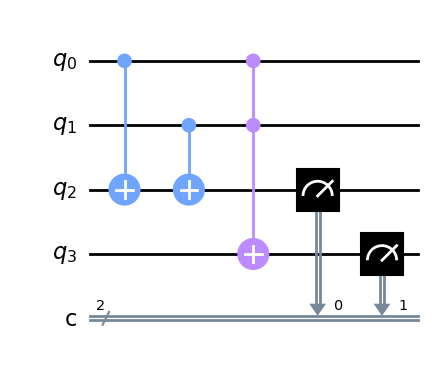

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(4, 2)

# First, encode an input (here '00')

# Next, carry out the adder
qc.cx(0, 2)
qc.cx(1, 2)
qc.ccx(0, 1, 3)

# Finally, measure bottom two qubits
qc.measure(2, 0)
qc.measure(3, 1)
qc.draw(output="mpl")

In [2]:
from qiskit.providers.aer import AerSimulator
sim = AerSimulator() # create a simulator

In [3]:
job = sim.run(qc) # run the circuit
result = job.result() # get the result
result.get_counts(qc) # get the counts

{'00': 1024}

configrc.store_credentials:WARNING:2023-01-10 20:14:05,058: Credentials already present. Set overwrite=True to overwrite.


Running on ibmq_manila
Job Status: job has successfully run


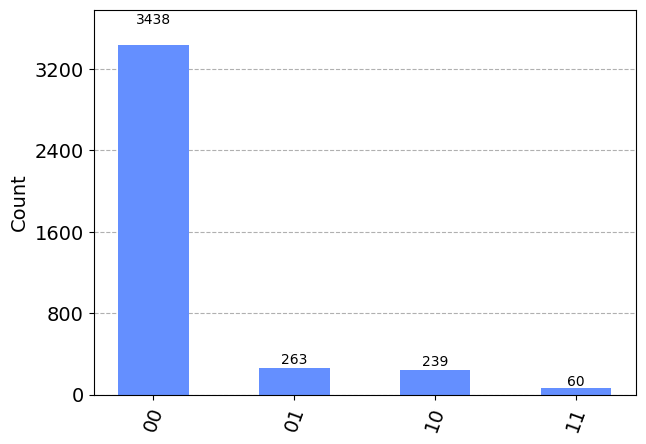

In [4]:
# 2. Ask IBM Quantum for its least busy device that isn't a simulator.
#    If you're running this example locally, you need to load your
#    account with your IBM Quantum API token
from qiskit.providers.ibmq import IBMQ, least_busy
IBMQ.save_account(token="1fe4ce1b8edb6b3beeb02b9d17f39551a5cff261a545b1ee19bef888399da4bba828527b74bcd4c2b3b670445a8748a2df010606ec942d43dadcdc3b25322234")
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
device = least_busy(
            provider.backends(
                filters= lambda x: not x.configuration().simulator
            )
        )
print(f'Running on {device.name()}')

# 3. Convert the program to a form the device can run.
#    This is known as 'transpiling'
from qiskit import transpile
transpiled_qc = transpile(qc, device)

# 4. Send the program off to IBM Quantum to run on a real device
#    and monitor its status.
from qiskit.tools import job_monitor
job = device.run(transpiled_qc)
job_monitor(job)

# 5. Plot the results as a histogram.
from qiskit.visualization import plot_histogram
plot_histogram(job.result().get_counts())

## Différence avec les circuits classique

* Les circuits classiques fonctionnent avec des portes (AND, OR, XOR, ...) et sont purement déterministe.
    - Un circuit quantique en utilise d'autre (X, Y, Z, H, CZ, ...) qui offre dans certains cas des possibilités d'algorithmes moins complexes.

* La complexité d'un algorithme dépend de la manière dont il varie si l'on augmente le nombre de donnée.

* Les circuit quantique se base sur la mesure de couche électronique par exemple, ce qui va permettre d'exploiter les propriétés lié à leur comportement probabiliste.

## D'un point de vue mathématique

Un systéme quantique peut être décrit via des vecteurs de probabilité. Par exemple, un qbit peut être présenter comme cela :

$$ \ket{a} = \begin{pmatrix}
\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}
\end{pmatrix} = \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} $$

Chaque composante du vecteur est un nombre complexe correspondant à l'amplitude (en prenant au carré, on obtient la probabilité de mesurer chaque état, dans ce cas 1/2 pour chaque un).

<IPython.core.display.Latex object>

{'0': 500, '1': 500}

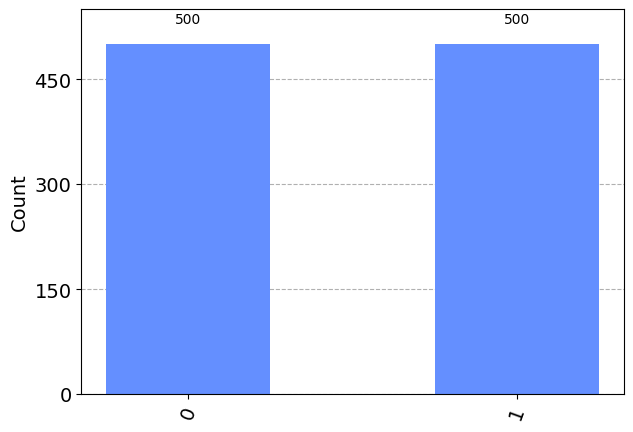

In [5]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

# creation d'un vecteur d'état
u = Statevector([1/sqrt(2),1/sqrt(2)])
display(u.draw('latex'))

from qiskit.visualization import plot_histogram

# simulation de mesures
statistics = u.sample_counts(shots=1000)
display(statistics)
plot_histogram(statistics)

Quant il y a plusieurs qbits, on va noter comme suit :

$$ \ket{ab} = \ket{a} \otimes \ket{b} = \begin{pmatrix}
a_1 b_1 \\ a_1 b_2 \\ a_2 b_1 \\ a_2 b_2
\end{pmatrix} $$

In [6]:
# Exemple d'un vecteur d'état de 2 qbits
plus = Statevector.from_label('+')
i_state = Statevector([1/sqrt(2), 1j/sqrt(2)])

psi = plus.tensor(i_state)

display(plus.draw('latex'))
display(i_state.draw('latex'))
display(psi.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

On peut ensuite parler des différente portes, ou opérateur logique. Ils peuvent être exprimé via des matrices, et leurs effets peuvent être décrit de plusieurs manière.
* Porte sur un qbit :

$$ X = \begin{pmatrix}
0 & 1 \\ 1 & 0
\end{pmatrix} \text{Transforme les 0 en 1 et 1 en 0} $$

$$ Z = \begin{pmatrix}
1 & 0 \\ 0 & -1
\end{pmatrix} \text{Inverse la phase des 1} $$

$$ H = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\ 1 & -1
\end{pmatrix} \text{Crée une superposition égale, Retourne la première valeur si appliqué deux fois} $$

* Sur plusieurs :

$$ CX = \begin{pmatrix}
1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0
\end{pmatrix} \text{Applique une porte X si le control vaut 1} $$

$$ CZ = \begin{pmatrix}
1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1
\end{pmatrix} \text{Inverse la phase si les deux qbits valent 1} $$

$$ ... $$

### Intrication

Il y a des états qui sont impossible à former à partir de deux qbits $ \ket{a}, \ket{b} $ comme par exemple 

$$ \frac{1}{\sqrt{2}}(\ket{00} + \ket{1}) $$

On dit alors qu'ils sont dans un état d'intrication. On peut créer cet état via un circuit simple.

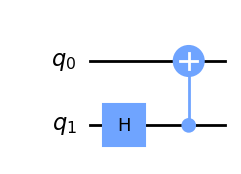

<IPython.core.display.Latex object>

In [7]:
qc = QuantumCircuit(2)

qc.h(1)
qc.cx(1, 0)

display(qc.draw(output='mpl'))

ket = Statevector(qc)
display(ket.draw(output='latex'))


## Quelques applications

### Transmettre 2 bits d'information via un seul qbit

Dans les deux circuits suivants, il y a deux (respectivement 3) personnes : Alice (qui envoit un message), Bob (qui recoit le message) et Charlie. Dans le premier, Alice envoit directement les informations de manière "normale" et doit donc coder sur les 2 bits. Dans le second, Charlie intrique les deux qbits, ce qui permet à Alice de coder son message sur un seul qbit.

In [8]:
# The message
MESSAGE = '00'

# ALice encodes the message
qc_alice = QuantumCircuit(2, 2)
if MESSAGE[-1] == '1':
    qc_alice.x(0)
if MESSAGE[-2] == '1':
    qc_alice.x(1)
    
from qiskit import Aer
backend = Aer.get_backend('aer_simulator')

# Bob measures
qc_bob = QuantumCircuit(2, 2)
qc_bob.measure([0, 1], [0, 1])

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'00': 1024}

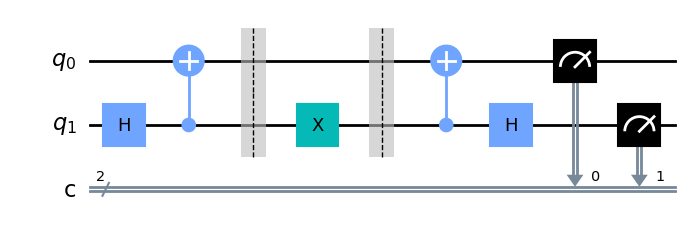

{'01': 1024}

In [19]:
# The message
MESSAGE = '01'

# ALice encodes the message
qc_alice = QuantumCircuit(2, 2)

if MESSAGE[-2] == '1':
    qc_alice.z(1)
if MESSAGE[-1] == '1':
    qc_alice.x(1)
    
qc_alice.barrier()

# Bob disentangles then measures
qc_bob = QuantumCircuit(2, 2)

qc_bob.cx(1, 0)
qc_bob.h(1)

qc_bob.measure([0, 1], [0, 1])
    
# Charlie send one qbits to Bob directly and one to Alice
qc_charlie = QuantumCircuit(2, 2)

qc_charlie.h(1)
qc_charlie.cx(1, 0)
qc_charlie.barrier()

complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
display(complete_qc.draw(output='mpl'))
backend.run(complete_qc).result().get_counts()


### Algorithme de Grover

C'est un algorithme de recherche composé d'un oracle qui inverse la phase de la réponse recherchée et d'un diffuser qui retourne les valeurs ayant une phase négative. L'algorithme et de complexité $O(\sqrt{n})$ alors que le brute force classique est de complexité $O(n)$. Il se déroule en 3 étapes principales :

1 Initialiser les qbit de départ avec une porte d'Hadamard

2 Appliquer l'oracle

3 Appliquer le diffuser

- Si besoin, répéter les étapes 2 et 3 $\sqrt{n}$ fois

Ci-dessous une implémentation simple de l'algorithme. Le principe d'un point de vue géométrique est de prendre un vecteur $ \ket{s} $ dans une base composé de $ \ket{x}, \ket{y} $ ou x sont les non-réponses et y les réponses. Alors, on fait avec l'oracle une symétrie selon $ \ket{x} $ puis selon $ \ket{s} $ avec l'oracle, ce qui fait que après ca, $ \ket{s} $ et plus proche de $ \ket{y} $.

In [24]:
oracle = QuantumCircuit(2)
oracle.cz(0, 1) # invert phase of |11>
oracle.barrier()

def display_unitary(qc, prefix=""):
    """Simulate the circuit and display the unitary matrix.

    Args:
        qc (QuantumCircuit): The circuit to compile to a unitary matrix.
        prefix (str): Optional LaTeX prefix for the matrix.
    Returns:
        None (displays matrix as side effect)
    """
    from qiskit import Aer
    from qiskit.visualization import array_to_latex
    sim = Aer.get_backend('aer_simulator')
    # Next, we'll create a copy of the circuit and work on
    # that so we don't change anything as a side effect.
    qc = qc.copy()
    # Tell the simulator to save the unitary matrix
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix))
    
display_unitary(oracle, "U_\\text{oracle} = ")

<IPython.core.display.Latex object>

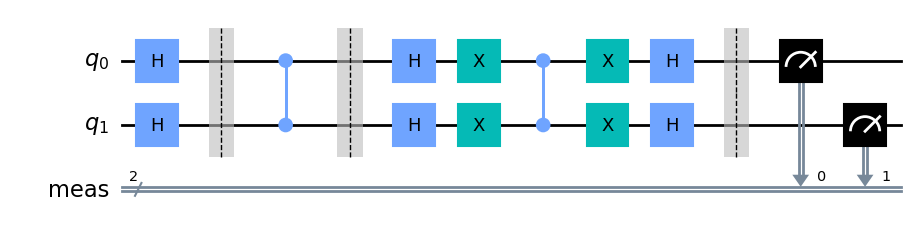

In [27]:
diffuser = QuantumCircuit(2)
diffuser.h([0, 1])
diffuser.x([0, 1])
diffuser.cz(0, 1)
diffuser.x([0, 1])
diffuser.h([0, 1])

grover = QuantumCircuit(2)
grover.h([0, 1]) # initialize |s>
grover.barrier()
grover = grover.compose(oracle)
grover = grover.compose(diffuser)
grover.measure_all()
grover.draw(output='mpl')

In [26]:
sim = Aer.get_backend('aer_simulator')
sim.run(grover).result().get_counts()

{'11': 1024}

## Que faire de plus ?

* Vulgarisation

* Implémentation d'un algorithme plus complexe (p.ex. Shor, ...)

* Faire un point d'histoire et parler machine

* ...